In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/contrails-images-ash-color/valid_df.csv
/kaggle/input/contrails-images-ash-color/train_df.csv
/kaggle/input/contrails-images-ash-color/contrails/7280765344389174364.npy
/kaggle/input/contrails-images-ash-color/contrails/4346581833392625389.npy
/kaggle/input/contrails-images-ash-color/contrails/1456416015873148574.npy
/kaggle/input/contrails-images-ash-color/contrails/6800558756216185574.npy
/kaggle/input/contrails-images-ash-color/contrails/858325960033384029.npy
/kaggle/input/contrails-images-ash-color/contrails/4590646951626644543.npy
/kaggle/input/contrails-images-ash-color/contrails/1771625900349667624.npy
/kaggle/input/contrails-images-ash-color/contrails/3997827613033060791.npy
/kaggle/input/contrails-images-ash-color/contrails/1285381515580332513.npy
/kaggle/input/contrails-images-ash-color/contrails/8859422950102863171.npy
/kaggle/input/contrails-images-ash-color/contrails/3630835461690169040.npy
/kaggle/input/contrails-images-ash-color/contrails/11773298128364047

In [3]:
x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]
low = 0
medium = 0
high = 0
import numpy as np
import os
for file in os.listdir("/kaggle/input/contrails-images-ash-color/contrails"):
    if(1+2==3): #Initially Considering Only 1000 Images. Will Be Scaling Up Later.
        a=np.load("/kaggle/input/contrails-images-ash-color/contrails/"+file)
        xa=a[:,:,:3]
        ya=a[:,:,3]
        if(np.sum(ya)>1500 and high < 10):
            x1.append(xa.astype('float32'))
            y1.append(ya.astype('float32'))
            high +=1
        elif(np.sum(ya)>500 and (np.sum(ya)<1000 and medium < 10)):
            x2.append(xa.astype('float32'))
            y2.append(ya.astype('float32'))
            medium +=1
        elif(np.sum(ya)>50 and (np.sum(ya)<250 and low < 10)):
            x3.append(xa.astype('float32'))
            y3.append(ya.astype('float32'))
            low +=1
    if(low>=10 and (medium>=10 and high>=10)):
        break

In [5]:
import numpy as np
for i in range(0,10):
    temp = np.dstack((np.array(x1[i]),np.array(y1[i])))
    np.save('h'+str(i),temp)
    temp = np.dstack((np.array(x2[i]),np.array(y2[i])))
    np.save('m'+str(i),temp)
    temp = np.dstack((np.array(x3[i]),np.array(y3[i])))
    np.save('l'+str(i),temp)
    
    

In [15]:
print(temp.shape)
y1 = temp[:,:,:3]
y2 = temp[:,:,3]
print(y2.shape)
print(np.sum(temp[:,:3]))
print(a.shape)

(256, 256, 4)
(256, 256, 3)
1220.2539
(256, 256, 4)


In [11]:
t = y3[0]
t = np.array(t)
print(np.sum(t))



51.0


In [2]:
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(2000, 256, 256, 3)
(2000, 256, 256)


In [3]:
y = y.reshape(2000,256,256,1)

In [4]:
!pip install -U -q segmentation-models
!pip install -q tensorflow
!pip install -q keras
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras
import segmentation_models as sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Segmentation Models: using `tf.keras` framework.


In [17]:
import tensorflow as tf
import cv2 
import numpy as np
import matplotlib.pyplot as plt
BACKBONE = 'efficientnetb5'

In [9]:
import segmentation_models
from segmentation_models import Unet
from keras import backend as K
def dice_loss(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1, 2, 3])
    total_pixels = K.sum(y_true, axis=[1, 2, 3]) + K.sum(y_pred, axis=[1, 2, 3])
    dice_coefficient = (2. * intersection + smooth) / (total_pixels + smooth)
    return 1. - dice_coefficient

In [18]:
model = Unet(BACKBONE,input_shape = (256,256,3),encoder_weights='imagenet',encoder_freeze=True)
#Using 'resnet34'(Residual Network) architecture as backbone architecture 
#Using encoder_weights(feature detector values) from the popular 'Imagenet' dataset , a kind of pre trainded weights
model.compile(optimizer='adam',loss=dice_loss,metrics=['accuracy'])
print(model.summary())

115515256/115515256 [==============================] - 6s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 128, 128, 48  1296        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 128, 128, 48  192         ['stem_conv[0][0]']              
                         

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)
print('Training Set Size ',len(xtrain))
print('Testing Set Size ',len(xtest))

Training Set Size  1600
Testing Set Size  400


In [19]:
results = model.fit(xtrain,ytrain,validation_split=0.2,batch_size=25,epochs= 40)

Epoch 1/40


2023-07-25 14:35:16.521128: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


52/52 [==============================] - 101s 727ms/step - loss: 0.8159 - accuracy: 0.8185 - val_loss: 0.8931 - val_accuracy: 0.6033
Epoch 2/40
52/52 [==============================] - 31s 598ms/step - loss: 0.6273 - accuracy: 0.9531 - val_loss: 0.7767 - val_accuracy: 0.9659
Epoch 3/40
52/52 [==============================] - 31s 597ms/step - loss: 0.5715 - accuracy: 0.9782 - val_loss: 0.7268 - val_accuracy: 0.9808
Epoch 4/40
52/52 [==============================] - 30s 587ms/step - loss: 0.5489 - accuracy: 0.9805 - val_loss: 0.7386 - val_accuracy: 0.9808
Epoch 5/40
52/52 [==============================] - 30s 587ms/step - loss: 0.4810 - accuracy: 0.9799 - val_loss: 0.9054 - val_accuracy: 0.6899
Epoch 6/40
52/52 [==============================] - 31s 596ms/step - loss: 0.4403 - accuracy: 0.9783 - val_loss: 0.6647 - val_accuracy: 0.9769
Epoch 7/40
52/52 [==============================] - 31s 596ms/step - loss: 0.4218 - accuracy: 0.9789 - val_loss: 0.5710 - val_accuracy: 0.9642
Epoch 8/4

In [20]:
y_pred = model.predict(xtest)
y_pred_thresholded = y_pred > 0.5
print(ytest.dtype)
print(y_pred_thresholded.dtype)
intersection = np.logical_and(ytest,y_pred_thresholded)
union = np.logical_or(ytest,y_pred_thresholded)
iou_score = np.sum(intersection)/np.sum(union)
print("IoU score is:",iou_score)


13/13 [==============================] - 9s 276ms/step
float32
bool
IoU score is: 0.422778544856167


In [24]:
test_img = xtest[19]
test_img = cv2.cvtColor(test_img,cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img,axis=0)
print(test_img.shape)
prediction=model.predict(test_img)
print(prediction.shape)
prediction = prediction.reshape(256,256,1)
print(ytest[19].shape)


(1, 256, 256, 3)
1/1 [==============================] - 0s 40ms/step
(1, 256, 256, 1)
(256, 256, 1)


2461.0803


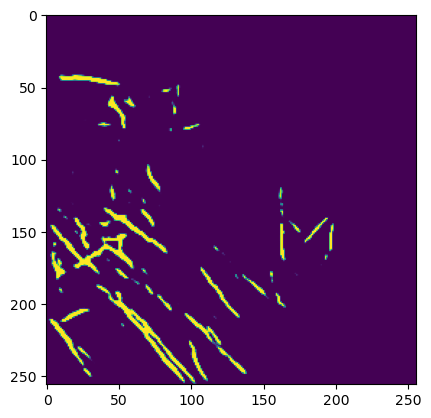

In [26]:
plt.imshow(prediction)
print(np.sum(prediction))
#predicted image

623606.0


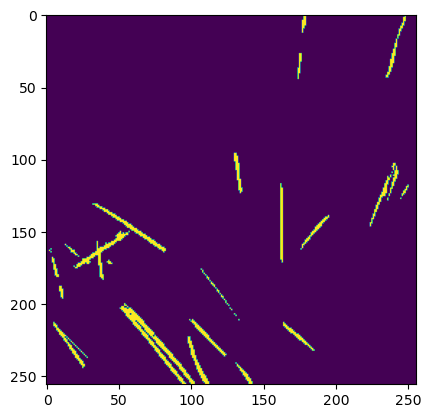

In [25]:
plt.imshow(ytest[19])
print(np.sum(ytest))
#Actual image 

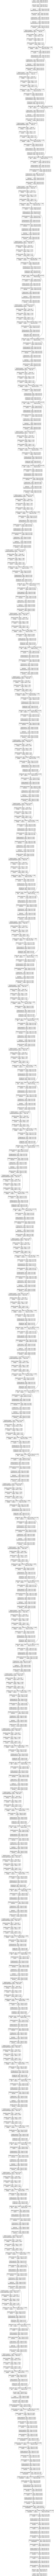

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='unet_model.png', show_shapes=True, show_layer_names=True)

In [6]:
import numpy as np
import os
x=[]
y=[]
c=0
cnt=0
for file in os.listdir('/kaggle/input/contrails-images-ash-color/contrails'):
    c+=1
    if(c>1):
        a=np.load('/kaggle/input/contrails-images-ash-color/contrails/'+file,mmap_mode='r')
        if(np.sum(a[:,:,3]) >= 500 and np.sum(a[:,:,3]) < 1500):
            x.append(a[:,:,:3])
            y.append(a[:,:,3])
            cnt+=1
        if(c%100==0):
            print(c)
print("cnt=",cnt)
import tensorflow as tf
print('started')
tf_dfx9 = tf.data.Dataset.from_tensor_slices(x)
print("c1")
tf_dfy9 = tf.data.Dataset.from_tensor_slices(y)
print("c2")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [2]:
import numpy as np
import os
x=[]
y=[]
c=0
for file in os.listdir('/kaggle/input/contrails-images-ash-color/contrails'):
    c+=1
    if(c>9000):
        a=np.load('/kaggle/input/contrails-images-ash-color/contrails/'+file,mmap_mode='r')
        # Loading in 'r' format 
        xa = a[:,:,:3]
        ya = a[:,:,3]
        x.append(xa)
        y.append(ya)
        if(c%10==0):
            print(c)
        if(c==10000):
            break
print('started')
tf_dfx10 = tf.data.Dataset.from_tensor_slices(x)
print("c1")
#tf_dfx = tf_dfx.shuffle(200)
#print("c2")
tf_dfy10 = tf.data.Dataset.from_tensor_slices(y)
print("c2")

9010
9020
9030
9040
9050
9060
9070
9080
9090
9100
9110
9120
9130
9140
9150
9160
9170
9180
9190
9200
9210
9220
9230
9240
9250
9260
9270
9280
9290
9300
9310
9320
9330
9340
9350
9360
9370
9380
9390
9400
9410
9420
9430
9440
9450
9460
9470
9480
9490
9500
9510
9520
9530
9540
9550
9560
9570
9580
9590
9600
9610
9620
9630
9640
9650
9660
9670
9680
9690
9700
9710
9720
9730
9740
9750
9760
9770
9780
9790
9800
9810
9820
9830
9840
9850
9860
9870
9880
9890
9900
9910
9920
9930
9940
9950
9960
9970
9980
9990
10000
started
c1
c2


In [3]:
import numpy as np
import os
x=[]
y=[]
c=0
for file in os.listdir('/kaggle/input/contrails-images-ash-color/contrails'):
    c+=1
    if(c>10000):
        a=np.load('/kaggle/input/contrails-images-ash-color/contrails/'+file,mmap_mode='r')
        # Loading in 'r' format 
        xa = a[:,:,:3]
        ya = a[:,:,3]
        x.append(xa)
        y.append(ya)
        if(c%10==0):
            print(c)
        if(c==11000):
            break
print('started')
tf_dfx11 = tf.data.Dataset.from_tensor_slices(x)
print("c1")
#tf_dfx = tf_dfx.shuffle(200)
#print("c2")
tf_dfy11 = tf.data.Dataset.from_tensor_slices(y)
print("c2")

10010
10020
10030
10040
10050
10060
10070
10080
10090
10100
10110
10120
10130
10140
10150
10160
10170
10180
10190
10200
10210
10220
10230
10240
10250
10260
10270
10280
10290
10300
10310
10320
10330
10340
10350
10360
10370
10380
10390
10400
10410
10420
10430
10440
10450
10460
10470
10480
10490
10500
10510
10520
10530
10540
10550
10560
10570
10580
10590
10600
10610
10620
10630
10640
10650
10660
10670
10680
10690
10700
10710
10720
10730
10740
10750
10760
10770
10780
10790
10800
10810
10820
10830
10840
10850
10860
10870
10880
10890
10900
10910
10920
10930
10940
10950
10960
10970
10980
10990
11000
started
c1
c2


In [4]:
import numpy as np
import os
x=[]
y=[]
c=0
for file in os.listdir('/kaggle/input/contrails-images-ash-color/contrails'):
    c+=1
    if(c>11000):
        a=np.load('/kaggle/input/contrails-images-ash-color/contrails/'+file,mmap_mode='r')
        # Loading in 'r' format 
        xa = a[:,:,:3]
        ya = a[:,:,3]
        x.append(xa)
        y.append(ya)
        if(c%10==0):
            print(c)
        if(c==12000):
            break
print('started')
tf_dfx12 = tf.data.Dataset.from_tensor_slices(x)
print("c1")
#tf_dfx = tf_dfx.shuffle(200)
#print("c2")
tf_dfy12 = tf.data.Dataset.from_tensor_slices(y)
print("c2")

11010
11020
11030
11040
11050
11060
11070
11080
11090
11100
11110
11120
11130
11140
11150
11160
11170
11180
11190
11200
11210
11220
11230
11240
11250
11260
11270
11280
11290
11300
11310
11320
11330
11340
11350
11360
11370
11380
11390
11400
11410
11420
11430
11440
11450
11460
11470
11480
11490
11500
11510
11520
11530
11540
11550
11560
11570
11580
11590
11600
11610
11620
11630
11640
11650
11660
11670
11680
11690
11700
11710
11720
11730
11740
11750
11760
11770
11780
11790
11800
11810
11820
11830
11840
11850
11860
11870
11880
11890
11900
11910
11920
11930
11940
11950
11960
11970
11980
11990
12000
started
c1
c2


In [8]:
ds = tf_dfy9.map(write_map_fn)
writer = tf.data.experimental.TFRecordWriter('new_data1y.tfrecord')
writer.write(ds)



In [2]:
def write_map_fn(x):
    return tf.io.serialize_tensor(x)
def read_map_fn(x):
    xp = tf.io.parse_tensor(x, tf.float16)
    # Optionally set shape
    xp.set_shape([256,256,3])  # Do `xp.set_shape([None, 1537])` if using batches
    # Use `x[:, :512], ...` if using batches
    return xp

In [ ]:
ds = tf.data.TFRecordDataset('/kaggle/working/mydata.tfrecord').map(read_map_fn)
print(ds)
xtrain = np.concatenate(list(numpy_iterator))
xtrain = xtrain.reshape(1000,256,256,3)
print(xtrain.shape)

In [12]:
import pickle
tf_data_path = '/kaggle/working'
tf.data.experimental.save(
    tf_dfx12, tf_data_path, compression='GZIP'
)
with open(tf_data_path + '/element_spec12', 'wb') as out_:  # also save the element_spec to disk for future loading
    pickle.dump(tf_dfx12.element_spec, out_)   

In [13]:
import pickle
tf_data_path = '/kaggle/working'
tf.data.experimental.save(
    tf_dfy12, tf_data_path, compression='GZIP'
)
with open(tf_data_path + '/element_specy12', 'wb') as out_:  # also save the element_spec to disk for future loading
    pickle.dump(tf_dfy12.element_spec, out_)   

In [ ]:
with open('/kaggle/input/xtrain/element_spec', 'rb') as in_:
    es = pickle.load(in_)
loaded = tf.data.experimental.load(
    tf_data_path, es, compression='GZIP'
)


In [11]:
print("hello world")

hello world


In [1]:
import numpy as np
d=[1,2,3,4]
d1 = np.array(d)
print(d1[0])

1


In [3]:
print(len(d1))

4
